In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import re 

In [3]:
data_dir =r'https://raw.githubusercontent.com/malinphy/IMDB_Analysis_different_approachs/main/IMDB_Dataset_short2.csv'

data = pd.read_csv(data_dir)

data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [3]:
data_reviews = data['review'].copy()

In [4]:
for i in range(len(data_reviews)):
    data_reviews[i] = re.sub("<br /><br />|,|\?|\(|\)|\"|!|:|@|#|&|\+"," ",data_reviews[i])
    data_reviews[i] = re.sub("-|_|\."," ",data_reviews[i])
    data_reviews[i] = data_reviews[i].lower()
    data_reviews[i] = re.sub("1|2|3|4|5|6|7|8|9|0","",data_reviews[i])
    data_reviews[i] = re.sub("  "," ",data_reviews[i])
    data_reviews[i] = re.sub("   "," ",data_reviews[i])

In [5]:
data_reviews[1]

"a wonderful little production  the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece  the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams' diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master's of comedy and his life  the realism really comes home with the little things the fantasy of the guard which rather than use the traditional 'dream' techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell's murals decorating every surface are terribly well done "

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

reviews_vector = vectorizer.fit_transform(data_reviews)
#vectorizer.get_feature_names()

In [7]:
#vectorizer for the sentiment values

sentiment_scores = data['sentiment'].copy()


sentiment_vectorizer = CountVectorizer().fit_transform(sentiment_scores)
sentiment_vector=sentiment_vectorizer.toarray()

In [8]:
sentiment_vector_1D = np.zeros(len(sentiment_vector))


for i in range(len(sentiment_vector)):
    sentiment_vector_1D[i] = sentiment_vector[i][0]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
reviews_train, reviews_test , sentiment_train, sentiment_test = train_test_split(
                                                                reviews_vector, sentiment_vector_1D,
                                                                train_size = 0.8 , random_state=42)

In [11]:
reviews_train.shape, reviews_test.shape, sentiment_train.shape, sentiment_test.shape

((15199, 67017), (3800, 67017), (15199,), (3800,))

$\textbf{Logistic Regression classifier}$

In [12]:

from sklearn.linear_model import LogisticRegression

LG = LogisticRegression()

LG.fit(reviews_train,sentiment_train)

sentiment_predict_score_LG=LG.predict(reviews_test)

C:\Users\user2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
reviews_train[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [15]:
sentiment_predict_score_LG

array([0., 1., 0., ..., 1., 1., 0.])

In [16]:
sentiment_test

array([0., 1., 0., ..., 1., 0., 0.])

In [17]:
from sklearn.metrics import precision_recall_fscore_support

In [18]:
y_true_LG = sentiment_test 
y_pred_LG = sentiment_predict_score_LG

LG_metrics=precision_recall_fscore_support(y_true_LG,y_pred_LG,average=None)
confusion_matrix(y_true_LG, y_pred_LG)

array([[1671,  209],
       [ 238, 1682]], dtype=int64)

In [19]:
import seaborn as sn

Text(0.5, 1.0, 'confusion matrix without normalization Logistic Regression')

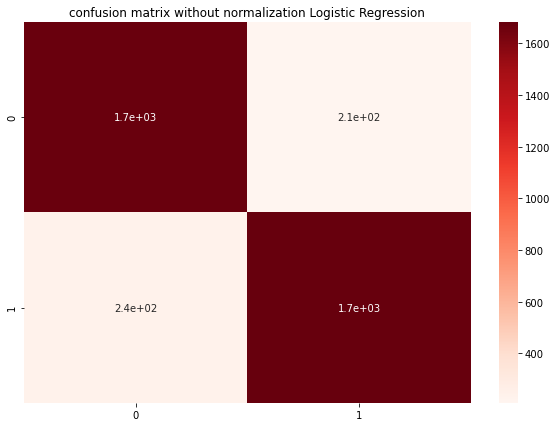

In [20]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_true_LG, y_pred_LG),annot=True,cmap=plt.cm.Reds)
plt.title('confusion matrix without normalization Logistic Regression')

In [21]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0)

In [22]:
DTC_fit=DTC.fit(reviews_train,sentiment_train)

In [23]:
sentiment_predict_score_DTC=DTC_fit.predict(reviews_test)

In [24]:
y_true_DTC = sentiment_test 
y_pred_DTC = sentiment_predict_score_DTC

DTC_metrics=precision_recall_fscore_support(y_true_DTC,y_pred_DTC,average=None)
confusion_matrix(y_true_DTC, y_pred_DTC)

array([[1365,  515],
       [ 537, 1383]], dtype=int64)

Text(0.5, 1.0, 'confusion matrix without normalization for Decision Tree')

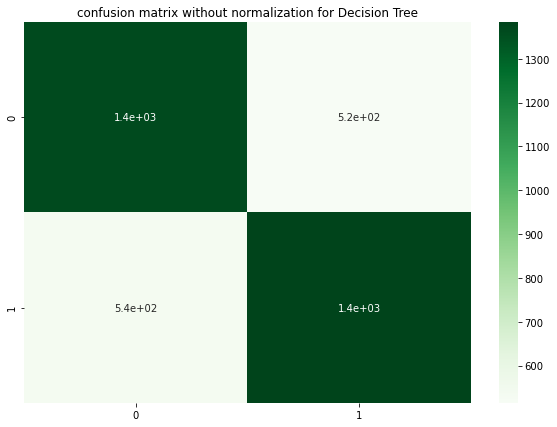

In [25]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_true_DTC, y_pred_DTC),annot=True,cmap=plt.cm.Greens)
plt.title('confusion matrix without normalization for Decision Tree')

$\textit{Random Forest Classifier}$

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
RFC= RandomForestClassifier()
RFC_fit=RFC.fit(reviews_train,sentiment_train)
sentiment_predict_score_RFC=RFC_fit.predict(reviews_test)

y_true_RFC = sentiment_test 
y_pred_RFC = sentiment_predict_score_DTC

RF_metrics=precision_recall_fscore_support(y_true_RFC,y_pred_RFC,average=None)
confusion_matrix(y_true_RFC, y_pred_RFC)

array([[1365,  515],
       [ 537, 1383]], dtype=int64)

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
def different_classifiers(X_train,y_train,X_test,y_test):

    #------ LOGISTIC REGRESSION
    
    LG = LogisticRegression()

    LG.fit(X_train,y_train)

    sentiment_predict_score_LG=LG.predict(X_test)
    
    y_true_LG = y_test 
    y_pred_LG = sentiment_predict_score_LG

    LG_metrics=precision_recall_fscore_support(y_true_LG,y_pred_LG,average=None)
    LG_confusion_matrix=confusion_matrix(y_true_LG, y_pred_LG)
    
    #------ LOGISTIC REGRESSION
    
    
    
    #------ RANDOM FOREST CLASSIFIER
    
    RFC= RandomForestClassifier()
    RFC_fit=RFC.fit(X_train,y_train)
    sentiment_predict_score_RFC=RFC_fit.predict(X_test)

    y_true_RFC = y_test  
    y_pred_RFC = sentiment_predict_score_RFC

    LG_metrics=precision_recall_fscore_support(y_true_RFC,y_pred_RFC,average=None)
    RFC_confusion_matrix = confusion_matrix(y_true_RFC, y_pred_RFC)
    
    #------ RANDOM FOREST CLASSIFIER
    
    
    #------ DECISION TREE CLASSIFIER
    
    DTC = DecisionTreeClassifier(random_state=0 )  
    DTC_fit = DTC.fit(X_train,y_train)
    sentiment_predict_score_DTC=DTC_fit.predict(X_test)
                                 
    y_true_DTC = y_test 
    y_pred_DTC = sentiment_predict_score_DTC

    DTC_metrics=precision_recall_fscore_support(y_true_DTC,y_pred_DTC,average=None)
    DTC_confusion_matrix = confusion_matrix(y_true_DTC, y_pred_DTC)
    
    #------ DECISION TREE CLASSIFIER
    
    
    return LG_confusion_matrix,RFC_confusion_matrix,DTC_confusion_matrix

In [30]:
Logistic_Reg, Random_For,Decision_Tree = different_classifiers(reviews_train,
                                                              sentiment_train,
                                                              reviews_test,
                                                              sentiment_test)

C:\Users\user2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print("Logistic Regression CM :\n",Logistic_Reg) , print("Random Forest CM:\n",Random_For), print("Decision Tree CM : \n", Decision_Tree)

Logistic Regression CM :
 [[1671  209]
 [ 238 1682]]
Random Forest CM:
 [[1628  252]
 [ 303 1617]]
Decision Tree CM : 
 [[1365  515]
 [ 537 1383]]


(None, None, None)

In [32]:
reviews_train.shape, reviews_test.shape, sentiment_train.shape, sentiment_test.shape

((15199, 67017), (3800, 67017), (15199,), (3800,))

In [33]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [34]:
keras_tokenizer = Tokenizer()

In [35]:
keras_tokenizer.fit_on_texts(data_reviews)

data_reviews_corpus = keras_tokenizer.word_index
# data_reviews_corpus_np = np.array(data_reviews_corpus)

keras_sequence = keras_tokenizer.fit_on_sequences(data_reviews)

In [36]:
keras_data_reviews=(keras_tokenizer.texts_to_matrix(data_reviews))
#

In [37]:
reviews_train_keras, reviews_test_keras , sentiment_train_keras, sentiment_test_keras = train_test_split(
                                                                keras_data_reviews,
                                                                sentiment_vector_1D,
                                                                train_size = 0.8 ,
                                                                random_state=42)

MemoryError: Unable to allocate 8.94 GiB for an array with shape (15199, 78925) and data type float64

In [ ]:
Logistic_Reg_keras, Random_For_keras,Decision_Tree_keras = different_classifiers(reviews_train_keras,
                                                              sentiment_train_keras,
                                                              reviews_test_keras,
                                                              sentiment_test_keras)


print("Logistic Regression CM_keras :\n",Logistic_Reg_keras) , print("Random Forest CM_keras:\n",Random_For_keras), print("Decision Tree CM_keras : \n", Decision_Tree_keras)